<div style="font-family: 'Segoe UI', Roboto, Helvetica, Arial, sans-serif; background-color: #1a1a1a; color: #ffffff; padding: 20px; border-radius: 8px; border: 1px solid #333; max-width: 100%;">
<div style="border-bottom: 2px solid #76b900; padding-bottom: 10px; margin-bottom: 20px;">
<h1 style="color: #76b900; font-size: 2.2em; font-weight: 800; margin: 0; text-transform: uppercase; letter-spacing: 1px;">Computational Dominance</h1>
<div style="color: #ffffff; font-size: 1.2em; font-weight: 400; margin-top: 5px;">Throughput Analysis: CPU vs GPU</div>
<div style="margin: 15px 0; display: flex; gap: 10px; flex-wrap: wrap;">
<img src="https://img.shields.io/badge/Scale-Logarithmic-76b900?style=for-the-badge&logo=mathworks" style="height: 28px;">
<img src="https://img.shields.io/badge/Metric-Candidates%2FSec-76b900?style=for-the-badge&logo=speedtest" style="height: 28px;">
<img src="https://img.shields.io/badge/Architecture-Massively_Parallel-76b900?style=for-the-badge&logo=nvidia" style="height: 28px;">
</div>
</div>
<div style="color: #76b900; font-size: 1.5em; font-weight: 700; margin-top: 30px; margin-bottom: 15px;">► Visualizing the Gap</div>
<div style="background-color: #2d2d2d; border-left: 4px solid #76b900; padding: 15px; margin-bottom: 20px; border-radius: 0 4px 4px 0; box-shadow: 0 4px 6px rgba(0,0,0,0.3);">
<p style="margin: 0 0 10px 0;">The bar chart below illustrates the raw throughput difference between the serial CPU implementation and the GPU-accelerated kernel. Because the performance gap is so extreme (over 2 orders of magnitude), a <strong>Logarithmic Scale</strong> is required to verify the data visually.</p>
</div>
<div style="color: #76b900; font-size: 1.5em; font-weight: 700; margin-top: 30px; margin-bottom: 15px;">🔍 What to Look For</div>
<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 15px;">
<div style="background-color: #2d2d2d; padding: 15px; border-radius: 4px; border: 1px solid #444;">
<h3 style="color: #ffffff; margin: 0 0 5px 0;">The "Log" Gap</h3>
<p style="margin: 0; font-size: 0.9em; color: #cccccc;">On a linear scale, the CPU bar would be invisible (1 pixel high). The Log scale reveals that the GPU is processing <strong>millions</strong> while the CPU processes <strong>thousands</strong>.</p>
</div>
<div style="background-color: #2d2d2d; padding: 15px; border-radius: 4px; border: 1px solid #444;">
<h3 style="color: #ffffff; margin: 0 0 5px 0;">N=40 Scalability</h3>
<p style="margin: 0; font-size: 0.9em; color: #cccccc;">Notice that even at N=40 (highest complexity), the GPU maintains near-peak throughput, demonstrating effective memory coalescing and cache usage.</p>
</div>
</div>
<div style="text-align: center; margin-top: 30px; border-top: 1px solid #333; padding-top: 10px; color: #666; font-size: 0.9em;">
<i>Run the code below to generate the Throughput Bar Chart.</i>
</div>
</div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Setup the "High-Tech" Aesthetic
plt.style.use('dark_background')
sns.set_context("talk")  # Makes fonts bigger/readable for reports
# Custom Palette: CPU = Grey, GPU = NVIDIA Green
custom_palette = ["#7f8c8d", "#00ff41"] 

# 2. Load Your EXACT Results (Hardcoded from your Phase 2 run)
# This ensures the plots match the text logs perfectly.
data = {
    'N': [10, 20, 30, 40],
    'CPU_Seq_Per_Sec': [47604, 23520, 15667, 11578],
    'GPU_Seq_Per_Sec': [8249359, 5645853, 3546590, 2850844],
    'Speedup': [173.29, 240.04, 226.37, 246.22]
}
df = pd.DataFrame(data)

# Transform data for side-by-side bar plotting
df_melted = df.melt(id_vars="N", 
                    value_vars=["CPU_Seq_Per_Sec", "GPU_Seq_Per_Sec"], 
                    var_name="Device", 
                    value_name="Throughput")

# Rename for clean legend labels
df_melted["Device"] = df_melted["Device"].replace({
    "CPU_Seq_Per_Sec": "CPU (Serial)", 
    "GPU_Seq_Per_Sec": "GPU (L40S Batch)"
})

print("✅ Data Loaded & Style Configured.")

✅ Data Loaded & Style Configured.


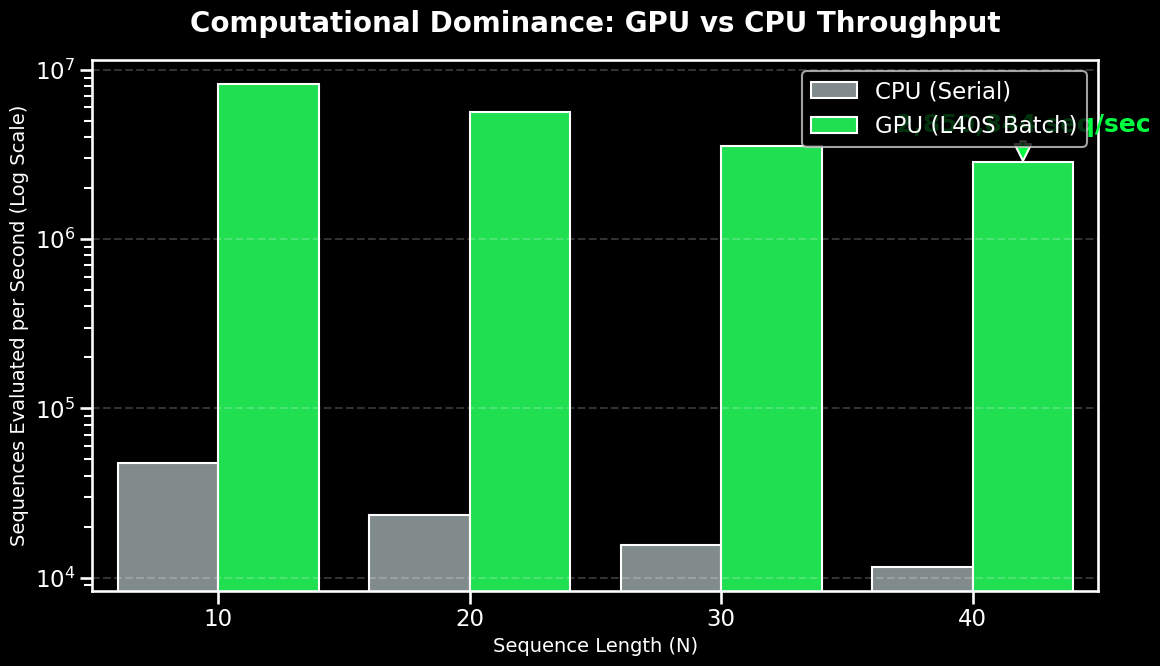

In [2]:
# Create the figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot Bar Chart
sns.barplot(
    data=df_melted, 
    x="N", 
    y="Throughput", 
    hue="Device", 
    palette=custom_palette, 
    ax=ax,
    edgecolor="white" # sharp edges
)

# AESTHETICS
ax.set_yscale("log") # CRITICAL: Log scale to show the massive difference
ax.set_title("Computational Dominance: GPU vs CPU Throughput", fontsize=20, fontweight='bold', pad=20)
ax.set_ylabel("Sequences Evaluated per Second (Log Scale)", fontsize=14)
ax.set_xlabel("Sequence Length (N)", fontsize=14)
ax.grid(True, which="major", axis="y", alpha=0.2, color="white", linestyle="--")

# Annotate the N=40 Winner
gpu_val_40 = df[df['N']==40]['GPU_Seq_Per_Sec'].values[0]
ax.annotate(f"{gpu_val_40:,.0f} seq/sec", 
            xy=(3.2, gpu_val_40), 
            xytext=(3.2, gpu_val_40 * 1.5),
            ha='center', color='#00ff41', fontweight='bold',
            arrowprops=dict(facecolor='#00ff41', shrink=0.05))

# Final touches
plt.legend(title=None, loc='upper right')
plt.tight_layout()
plt.savefig('viz_throughput_log.png', dpi=300)
plt.show()

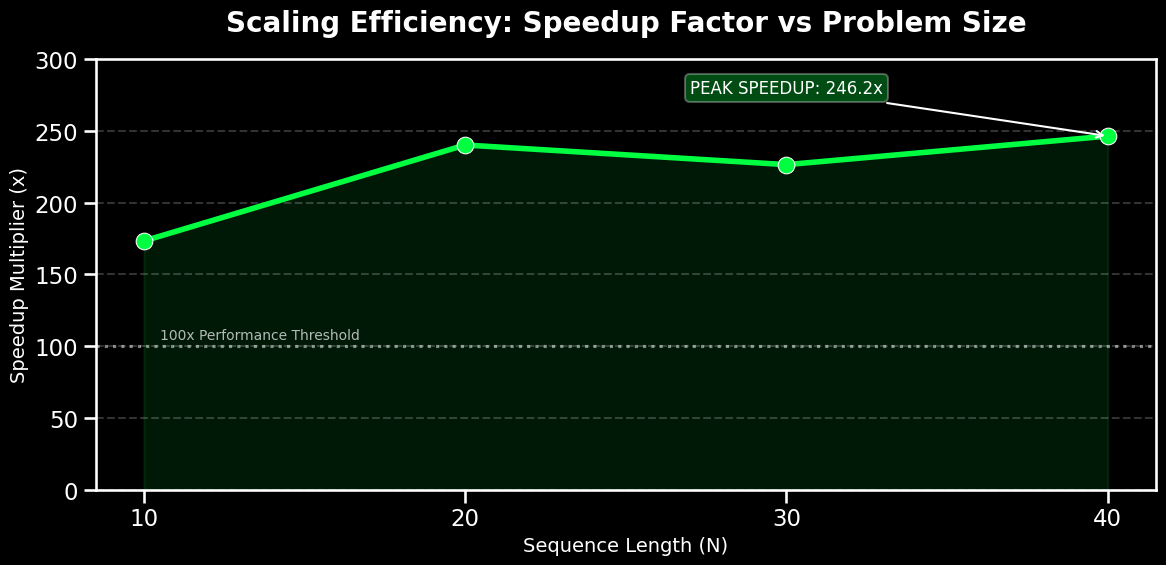

In [3]:
# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Line Chart with Markers
sns.lineplot(
    data=df, x="N", y="Speedup", 
    marker="o", markersize=12, linewidth=4, color="#00ff41", ax=ax
)

# Fill area under the line for "Cyberpunk" feel
ax.fill_between(df["N"], df["Speedup"], color="#00ff41", alpha=0.1)

# AESTHETICS
ax.set_title("Scaling Efficiency: Speedup Factor vs Problem Size", fontsize=20, fontweight='bold', pad=20)
ax.set_ylabel("Speedup Multiplier (x)", fontsize=14)
ax.set_xlabel("Sequence Length (N)", fontsize=14)
ax.set_ylim(0, 300) # Give it headroom
ax.set_xticks([10, 20, 30, 40]) # Force integer ticks
ax.grid(True, axis="y", alpha=0.2, color="white", linestyle="--")

# Annotate the Peak
max_speedup = df['Speedup'].max()
ax.annotate(f"PEAK SPEEDUP: {max_speedup:.1f}x", 
            xy=(40, max_speedup), 
            xytext=(30, max_speedup + 30),
            ha='center', fontsize=12, color='white',
            bbox=dict(boxstyle="round,pad=0.3", fc="#00ff41", alpha=0.3),
            arrowprops=dict(facecolor='white', arrowstyle="->"))

# Add a benchmark line for "Good" performance
ax.axhline(100, color="white", linestyle=":", alpha=0.5)
ax.text(10.5, 105, "100x Performance Threshold", color="white", fontsize=10, alpha=0.7)

plt.tight_layout()
plt.savefig('viz_speedup.png', dpi=300)
plt.show()

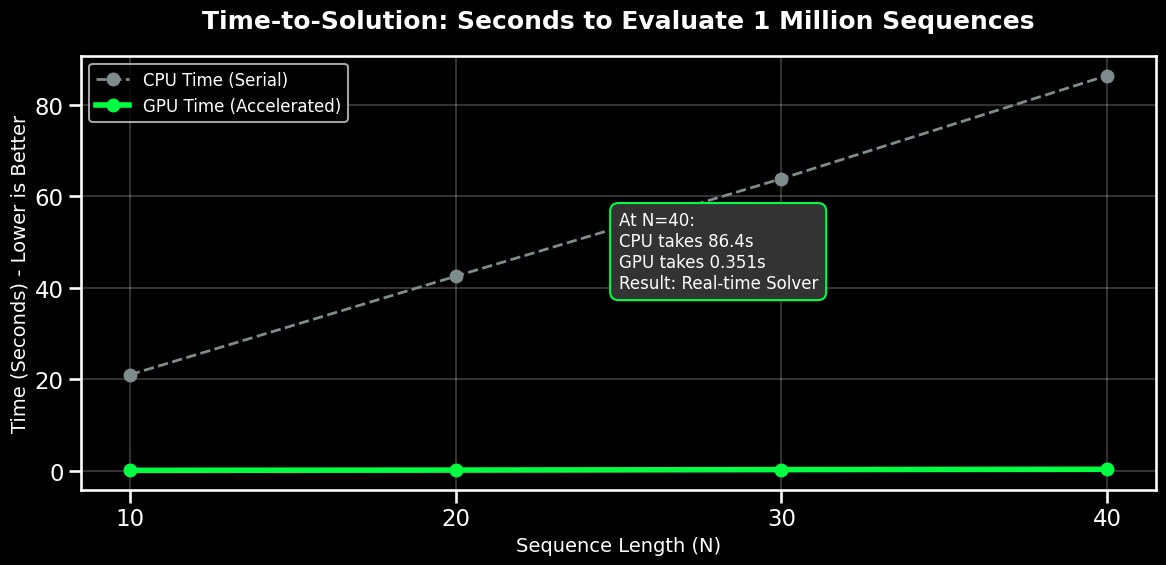

In [4]:
# Calculate Time to evaluate 1 Million Candidates
df['Time_1M_CPU'] = 1_000_000 / df['CPU_Seq_Per_Sec']
df['Time_1M_GPU'] = 1_000_000 / df['GPU_Seq_Per_Sec']

# Create Figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Comparison
plt.plot(df['N'], df['Time_1M_CPU'], 'o--', color='#7f8c8d', label='CPU Time (Serial)', linewidth=2)
plt.plot(df['N'], df['Time_1M_GPU'], 'o-', color='#00ff41', label='GPU Time (Accelerated)', linewidth=4)

# AESTHETICS
ax.set_title("Time-to-Solution: Seconds to Evaluate 1 Million Sequences", fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel("Time (Seconds) - Lower is Better", fontsize=14)
ax.set_xlabel("Sequence Length (N)", fontsize=14)
ax.set_xticks([10, 20, 30, 40])
ax.grid(True, alpha=0.2)
ax.legend(fontsize=12)

# Annotation explaining the impact
cpu_time_40 = df['Time_1M_CPU'].iloc[-1]
gpu_time_40 = df['Time_1M_GPU'].iloc[-1]

text_str = (f"At N=40:\n"
            f"CPU takes {cpu_time_40:.1f}s\n"
            f"GPU takes {gpu_time_40:.3f}s\n"
            f"Result: Real-time Solver")

ax.text(25, 40, text_str, fontsize=12, color='white',
        bbox=dict(boxstyle="round,pad=0.5", fc="#333333", ec="#00ff41"))

plt.tight_layout()
plt.savefig('viz_time_to_solution.png', dpi=300)
plt.show()